# Overview

<ol>
    <li>Importing Libraries</li>
<li>Importing Dataset</li>
<li>Creating Custom Layer</li>
<li>Creating model</li>
<li>Model Training</li>
<li>Comparison with ReLu</li>
</ol>

# 1. Importing Libraries

In [4]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt

%matplotlib inline

print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.1.0


# 2. Importing Dataset

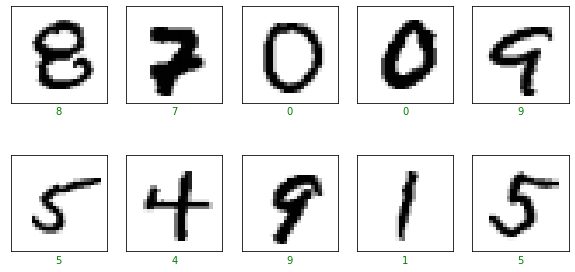

In [5]:
(x_train, y_train), (x_test, y_test) = utils.load_data()      # loading mnist dataset

utils.plot_random_examples(x_train, y_train).show()        # plotting some random data from whole dataset

# 3. Creating Custom Layer

In [13]:
# A paramtericRelu is same as Leaky Relu but the alpha value in Leaky Relu is defined by user whereas in ...
# Parametric Relu it is a trainable variable.

# Fucntions:
# -> build : Define trainable weights
# -> call  : Logic of the custom layer
# -> computeOuput : transformation logic

class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name = 'alpha',
            shape = (1,),
            initializer = 'zeros',
            trainable = True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

# 4. Creating the Model

In [16]:
def create_model(use_prelu = True):
    model= tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape = (784,)))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation ='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
    
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
parametric_relu_3 (Parametri (None, 64)                1         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# 5. Model Training

In [17]:
#Intial value of alpha (trainiable value)
print('Initial value: ', model.layers[1].get_weights())

Initial value:  [array([0.], dtype=float32)]


In [18]:
hist = model.fit(
    x_train, y_train,
    validation_data =(x_test, y_test),
    epochs = 5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2858 - accuracy: 0.9192 - val_loss: 0.1423 - val_accuracy: 0.9569
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1188 - accuracy: 0.9652 - val_loss: 0.1031 - val_accuracy: 0.9683
Epoch 3/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0836 - accuracy: 0.9749 - val_loss: 0.1046 - val_accuracy: 0.9667
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0664 - accuracy: 0.9801 - val_loss: 0.0937 - val_accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.1013 - val_accuracy: 0.9692


In [19]:
#Final value of alpha (trainiable value)
print('Final value: ', model.layers[1].get_weights())

Final value:  [array([-0.81945634], dtype=float32)]


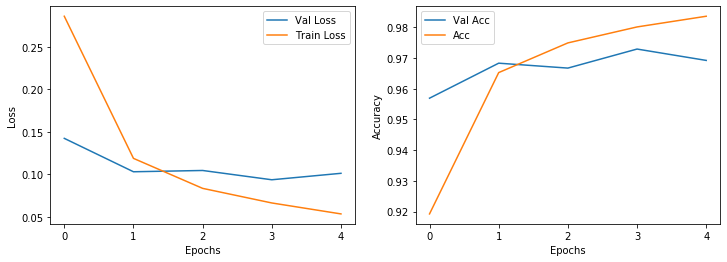

In [21]:
utils.plot_results(hist).show()

# 6. Comparison with ReLu

In [22]:
model = create_model(use_prelu= False)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(
    x_train, y_train, 
    validation_data = (x_test, y_test),
    epochs = 5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3030 - accuracy: 0.9154 - val_loss: 0.1754 - val_accuracy: 0.9494
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1454 - accuracy: 0.9574 - val_loss: 0.1223 - val_accuracy: 0.9624
Epoch 3/5
60000/60000 [==============================] - 7s 108us/sample - loss: 0.1048 - accuracy: 0.9688 - val_loss: 0.0989 - val_accuracy: 0.9713
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0894 - val_accuracy: 0.9730
Epoch 5/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.0864 - val_accuracy: 0.9754


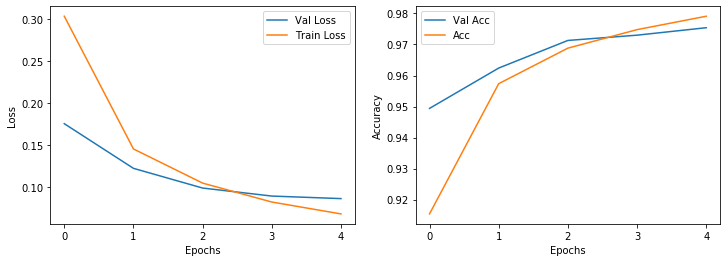

In [24]:
utils.plot_results(hist).show()